In [ ]:
import pandas as pd
from sklearn.ensemble import RandomTreesEmbedding
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.head()

,Years,inflation,"Criminal offences, total (%)",Offences excluding road traffic offences (%),Road traffic offences (%),Offences under Penal Code (excl. traffic) (%),"Offences against the state, public order (%)",Offences against sexual self-determination (%),Sexual abuse of children (%),Rape (%),...,Other property offences (%),Fraud (%),Forgery (%),"Off.c.common danger,off.ag.environm.(excl.traffic) (%)",Road traffic offences under the Penal Code (%),Offences under the Road Traffic Act (%),Offences under other federal or Land laws (%),Offences under the Narcotics Act (%),Offences under the Residence Act (%),GDP (%)
5,1981,6.344243,0.033087,0.079465,-0.028323,0.099242,0.071405,0.010969,-0.035589,-0.005344,...,0.134904,0.180881,0.103051,0.001043,-0.032955,-0.008921,-0.003577,0.002991,-0.235976,-0.029852
6,1982,5.241045,0.016140,0.037860,-0.015811,0.049528,0.027957,0.042156,-0.045372,0.023024,...,0.096028,0.139044,0.015507,-0.035722,0.000155,-0.081059,-0.016185,0.040748,-0.305790,-0.007587
7,1983,3.293415,-0.039839,-0.023693,-0.064884,-0.025330,-0.020168,-0.011094,-0.027250,-0.012753,...,0.050732,0.075581,-0.002057,-0.006372,-0.049875,-0.131640,-0.015604,0.026514,-0.118044,-0.059133
11,1987,0.200000,0.016488,0.018873,0.012377,0.015235,-0.018266,0.017291,0.076808,-0.043928,...,0.015882,-0.004074,0.045925,0.044068,0.013455,0.005268,0.036303,0.092594,-0.038481,0.079386
12,1988,1.274119,-0.013226,-0.020270,-0.001000,-0.031017,-0.015420,-0.020032,0.052632,-0.083784,...,-0.005961,0.008244,-0.040239,0.043497,-0.000976,-0.001161,0.030178,0.071247,0.265257,-0.001617


# **Crime Crime Analysis**

In this study, we investigate German crime rates over years.

### Exploring data

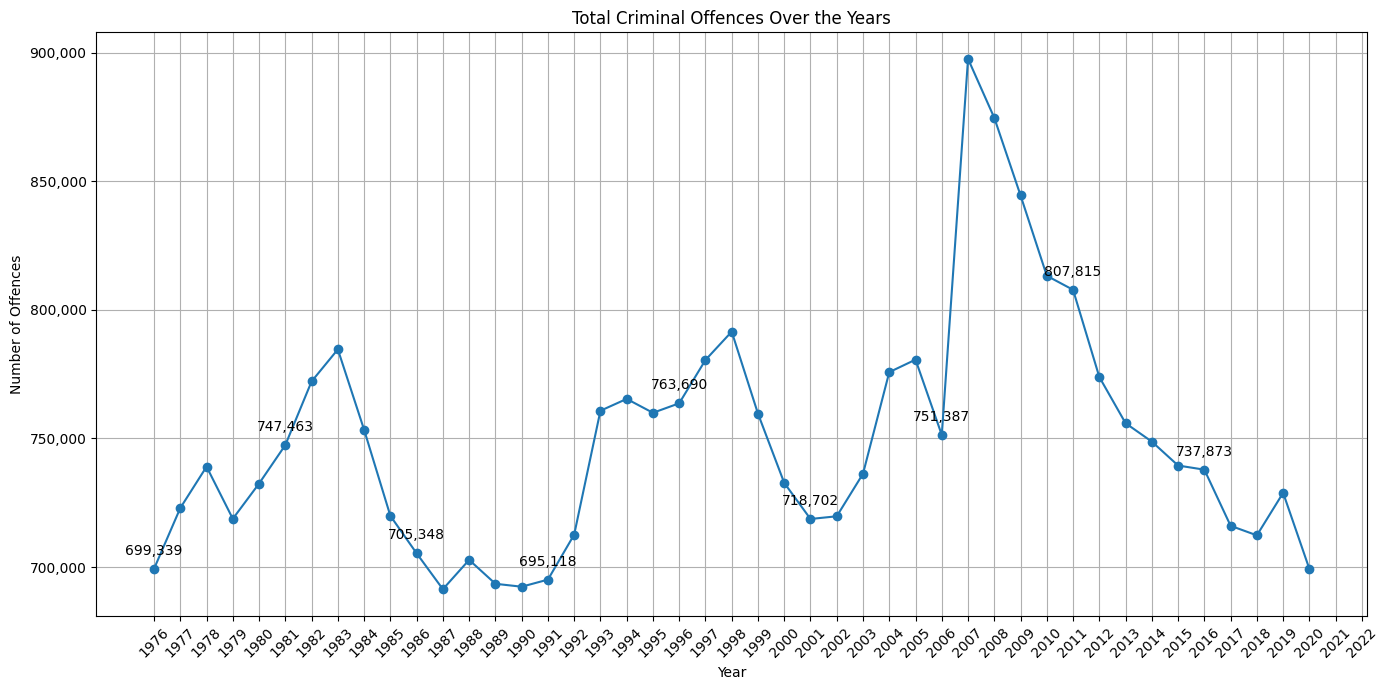

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
crime_data = pd.read_excel("data_crime.xlsx")

# Transpose the data so that years are the index
crime_data_transposed = crime_data.set_index('Type of criminal offence').transpose()

# Now, the transposed data has years as the index, which will allow for time series analysis
plt.figure(figsize=(14, 7))

# Plot the 'Criminal offences, total' column
plt.plot(crime_data_transposed.index, crime_data_transposed['Criminal offences, total'], marker='o')

# Annotate every 5 years
for i, year in enumerate(crime_data_transposed.index):
    if i % 5 == 0:  # Every 5th year
        plt.annotate(f"{crime_data_transposed['Criminal offences, total'][year]:,.0f}",  # Format with commas, no decimal places
                     (year, crime_data_transposed['Criminal offences, total'][year]),
                     textcoords="offset points",  # how to position the text
                     xytext=(0,10),  # distance from text to points (x,y)
                     ha='center')  # horizontal alignment can be left, right or center

# Set the y-axis formatter to include commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Total Criminal Offences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Above graph we see German total crime rates over the years. Interestingly we observe a peak in 2008. First thing that we relate is 2008 economic crisis. People may tend to involve in crimes as they get poorer.


Firstly, we want to explore different crime types change over the years.

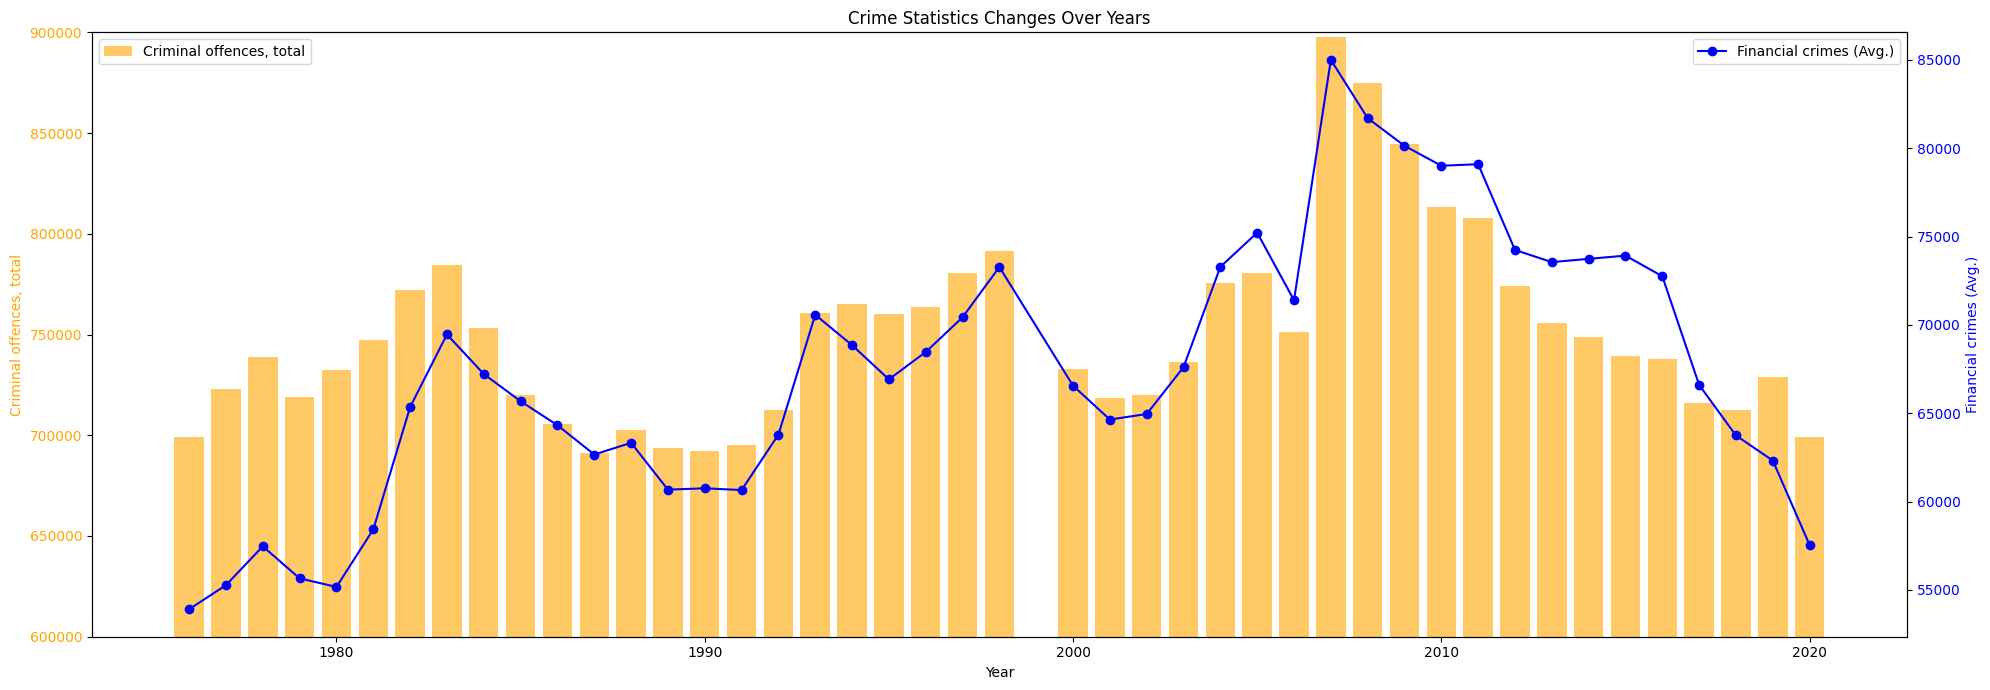

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
crime_data_e = pd.read_excel("crime_d_t.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)

# Create the figure and the first axis for the bar plot
fig, ax1 = plt.subplots(figsize=(20, 7))

# Plot 'Criminal offences, total' as a bar plot on the first axis
ax1.bar(crime_data_e.index, crime_data_e['Criminal offences, total'], label='Criminal offences, total', color='orange', alpha=0.6)

# Set the range for the primary y-axis
ax1.set_ylim(600000, 900000)

# Set the labels and title for the first axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Criminal offences, total', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_title('Crime Statistics Changes Over Years')
ax1.legend(loc='upper left')

# Create a second axis for the line graph
ax2 = ax1.twinx()
ax2.plot(crime_data_e.index, crime_data_e['Financial crimes (Avg.)'], label='Financial crimes (Avg.)', marker='o', color='blue')

# Set the label for the second y-axis
ax2.set_ylabel('Financial crimes (Avg.)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

# Show the plot with a tight layout to ensure everything fits
plt.tight_layout()
plt.show()


Since above graph is showing crimes at levels, we illustrate data as percentage change over years as follows:

As we have many different types of the crimes, we firstly wanted to see which crimes are having similar patterns over years.

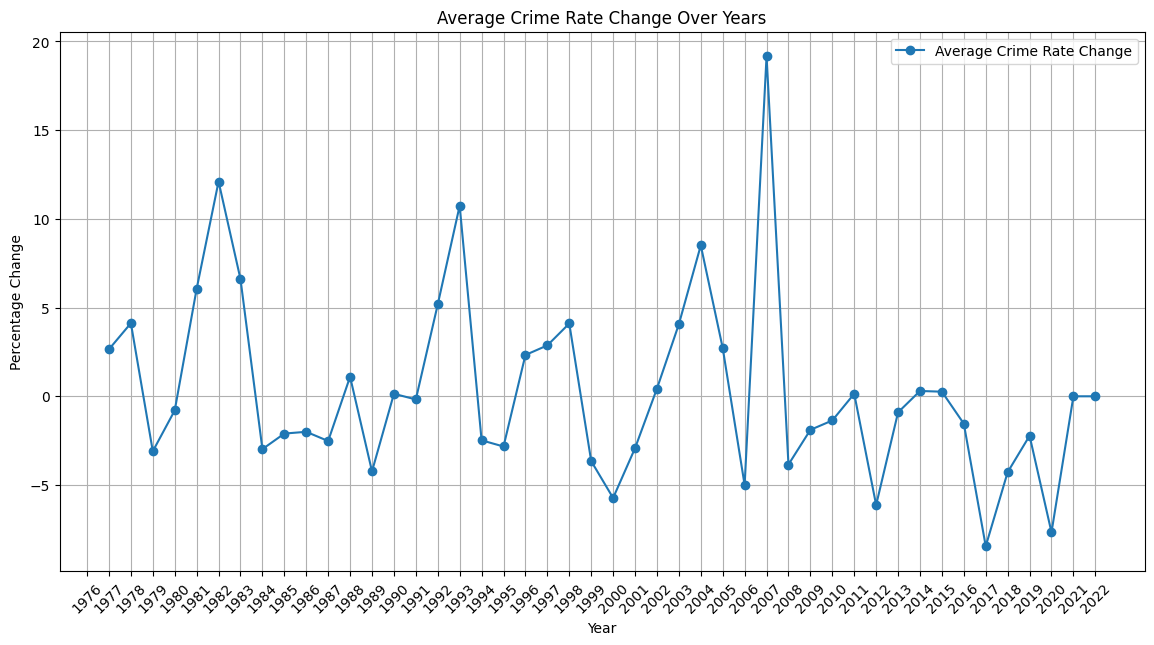

### 1. Clustering analysis
We make this analysis in order to see which type of the crimes have similar trends. We use random forest technique in the analysis.

---



In [30]:
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
df = crime_data_e.drop(columns=['GDP (%)', 'inflation', 'Years', 'Criminal offences, total (%)'])

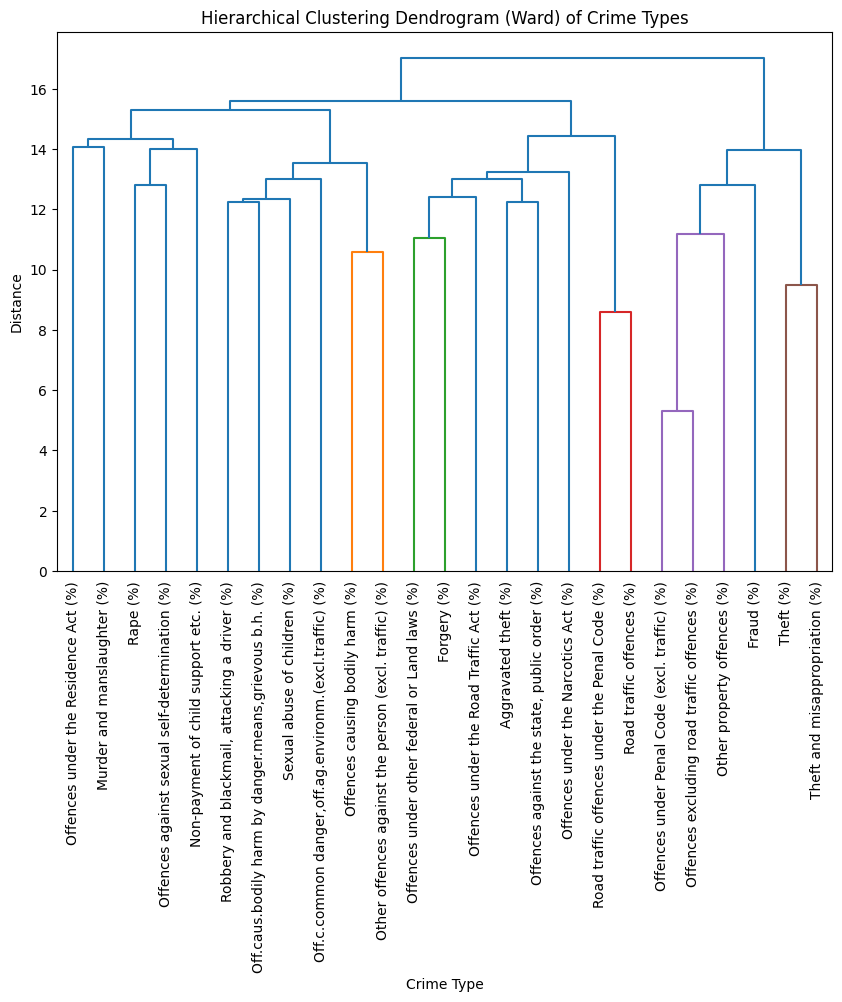

In [31]:
# Clean the dataset by replacing '.' with NaN and then impute these with the mean of the column
crime_data_eco_cleaned = df.apply(pd.to_numeric, errors='coerce').fillna(df.mean())

# Using RandomTreesEmbedding to transform the data by type
embedder_by_type = RandomTreesEmbedding(n_estimators=100, random_state=42)
embedding_by_type = embedder_by_type.fit_transform(crime_data_eco_cleaned.T)  # Transpose to get crimes as features

# The embedding is a sparse matrix. For clustering, we'll convert it to dense format
embedding_by_type_dense = embedding_by_type.todense()

# Perform hierarchical clustering on the dense embedding by type
linked_by_type = linkage(embedding_by_type_dense, 'ward')

# Plot the dendrogram for crime types
plt.figure(figsize=(10, 7))
dendrogram(linked_by_type, orientation='top', labels=crime_data_eco_cleaned.columns, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward) of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


Above cluster, we aim to see if financial related indicators (ie. theft, propoerty related crimes, fraud) are falling into similar cluster. We see towards to the right side of graph, we see that fraud, other property offences, theft and theft and misappropriation are having similar trends.

Furthermore, apart from the clusterin, we check visually finance related crimes below.

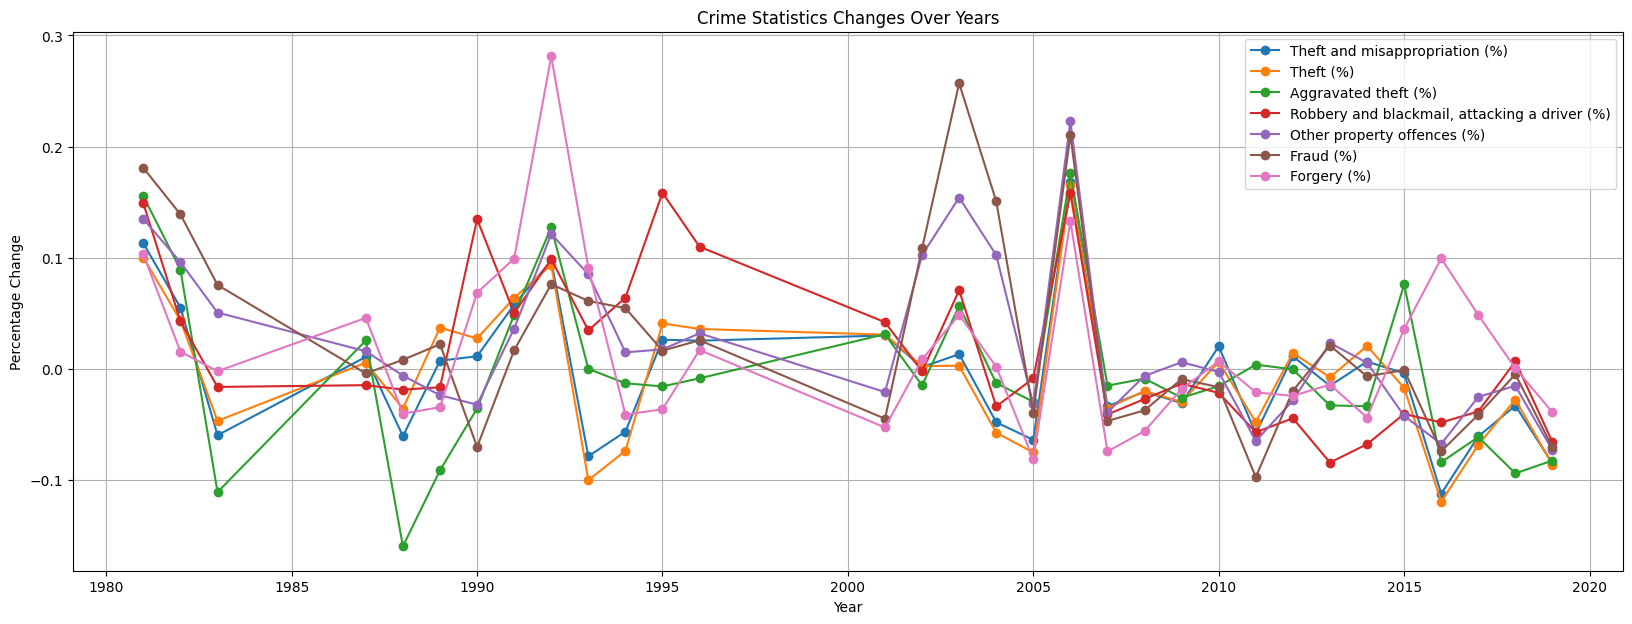

In [ ]:
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)

# Select the three columns you want to plot, for example 'Inflation', 'Criminal offences, total (%)',
# and 'Offences excluding road traffic offences (%)'. Replace these with the actual column names you want to plot.
plt.figure(figsize=(20, 7))
plt.plot(crime_data_e.index, crime_data_e['Theft and misappropriation (%)'], label='Theft and misappropriation (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Theft (%)'], label='Theft (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Aggravated theft (%)'], label='Aggravated theft (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Robbery and blackmail, attacking a driver (%)'], label='Robbery and blackmail, attacking a driver (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Other property offences (%)'], label='Other property offences (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Fraud (%)'], label='Fraud (%)', marker='o')
plt.plot(crime_data_e.index, crime_data_e['Forgery (%)'], label='Forgery (%)', marker='o')

plt.title('Crime Statistics Changes Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

Importantly we see correlation of finance related data with economic indicators with a heatmap if our hypothesis which is finance related crimes have correlation with economic issues:

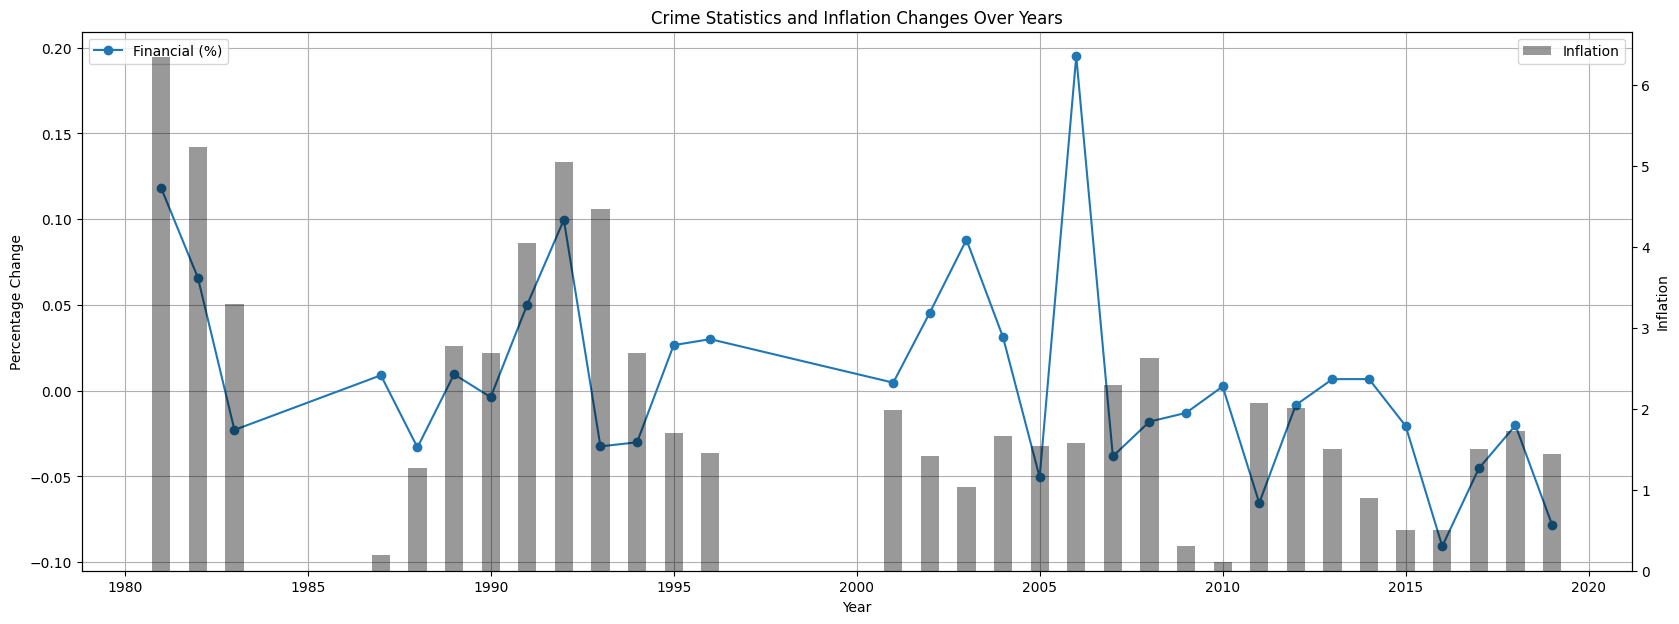

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
crime_data_e = pd.read_excel("data_crime_econ.xlsx")
crime_data_e = crime_data_e.dropna()
crime_data_e.set_index('Years', inplace=True)

# Create the figure and the first axis for the line plots
fig, ax1 = plt.subplots(figsize=(20, 7))

# Plot the crime data as line plots
ax1.plot(crime_data_e.index, crime_data_e['Financial (%)'], label='Financial (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Theft (%)'], label='Theft (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Aggravated theft (%)'], label='Aggravated theft (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Robbery and blackmail, attacking a driver (%)'], label='Robbery and blackmail, attacking a driver (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Other property offences (%)'], label='Other property offences (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Fraud (%)'], label='Fraud (%)', marker='o')
#ax1.plot(crime_data_e.index, crime_data_e['Forgery (%)'], label='Forgery (%)', marker='o')

# Set the labels and title for the first axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage Change')
ax1.set_title('Crime Statistics and Inflation Changes Over Years')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second axis for the GDP bar plot
ax2 = ax1.twinx()
ax2.bar(crime_data_e.index, crime_data_e['inflation'], label='Inflation', color='black', alpha=0.4, width=0.5)

# Set the label for the second y-axis
ax2.set_ylabel('Inflation')

# Make a second legend for the GDP bar plot
ax2.legend(loc='upper right')

# Show the plot
plt.show()


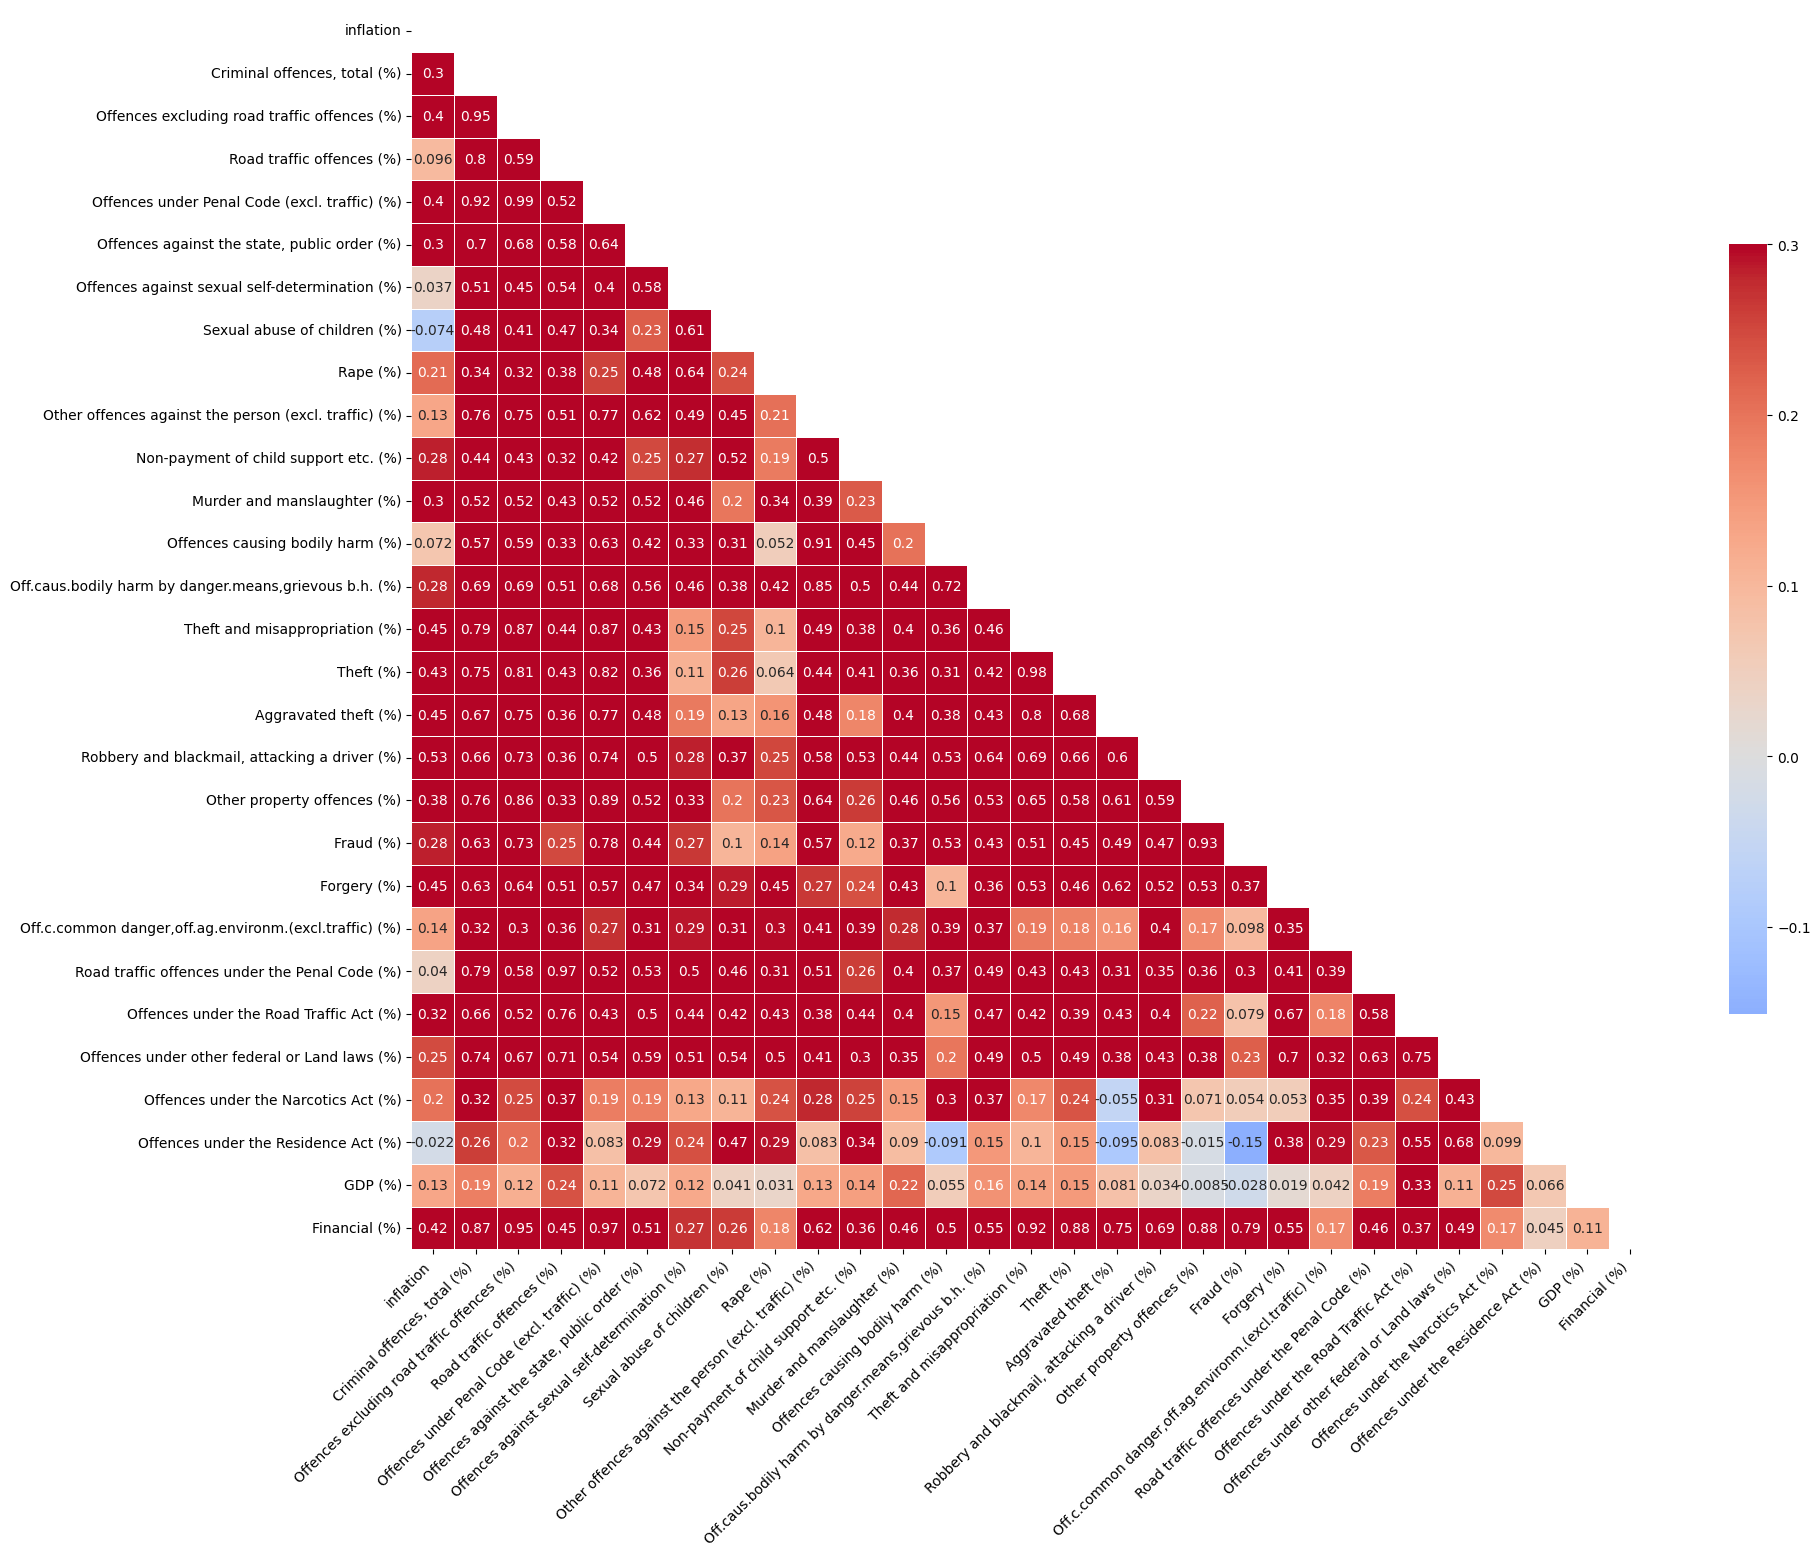

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_excel("data_crime_econ.xlsx")

# Drop the 'Years' column before calculating the correlation matrix
df = df.drop(columns=['Years'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle (optional, if you want to mask the upper triangle of the heatmap)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


We observe correlation between inflation and financial crimes correlation as 0.42. It is inline with our expectations.

We can visualize crimes in the first cluster

Two closely related crimes

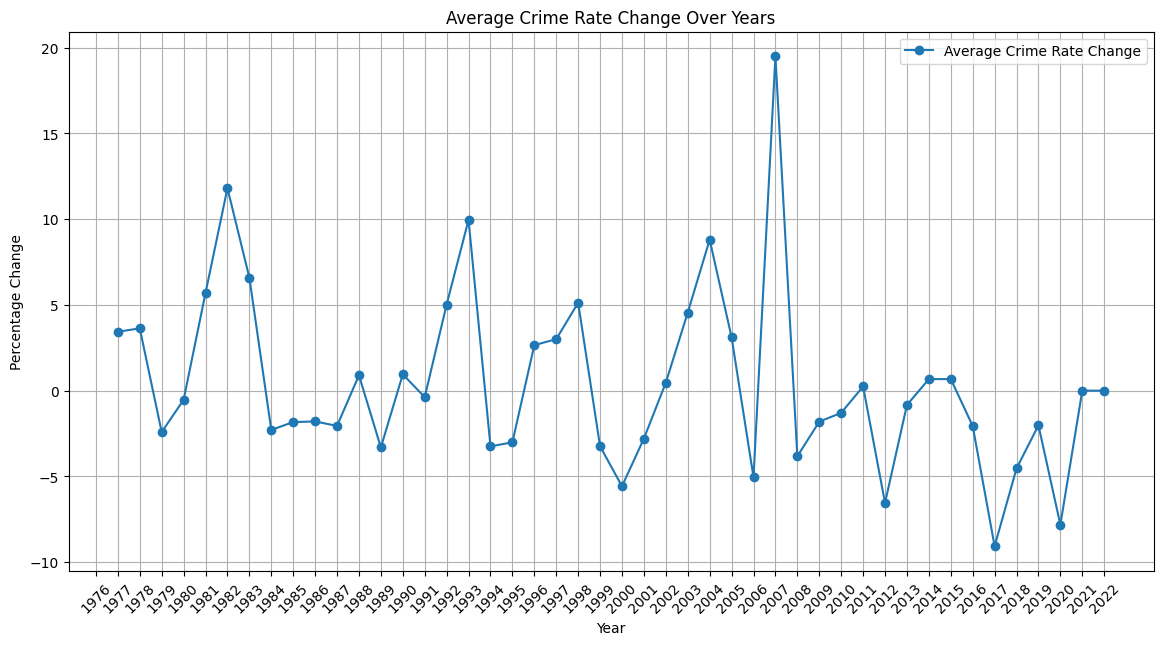

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
crime_data = pd.read_excel("data_crime.xlsx")
crime_data_transposed = crime_data.set_index('Type of criminal offence').transpose()
crime_data_transposed_cleaned = crime_data_transposed.apply(pd.to_numeric, errors='coerce')

# Drop columns that are entirely NaN as they do not represent valid crime data
crime_data_transposed_cleaned = crime_data_transposed_cleaned.dropna(axis=1, how='all')

# Calculate the average of the specified crimes for each year
selected_crimes = ['Theft and misappropriation', 'Theft', 'Other property offences',
                   'Fraud']
crime_data_transposed_cleaned['Average Crime Rate'] = crime_data_transposed_cleaned[selected_crimes].mean(axis=1)

# Calculate the percentage change of the average crime rate over the years
crime_data_transposed_cleaned['Avg Crime Rate Change'] = crime_data_transposed_cleaned['Average Crime Rate'].pct_change() * 100

# Now plot the percentage change of the average crime rate
plt.figure(figsize=(14, 7))
plt.plot(crime_data_transposed_cleaned.index, crime_data_transposed_cleaned['Avg Crime Rate Change'], label='Average Crime Rate Change', marker='o')

plt.title('Average Crime Rate Change Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
